In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("deeplearning.mplstyle")
from lab_utils_commons import plot_data, sigmoid,dlc

In [7]:
# training set 
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)  2-D
y_train = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)   1-D

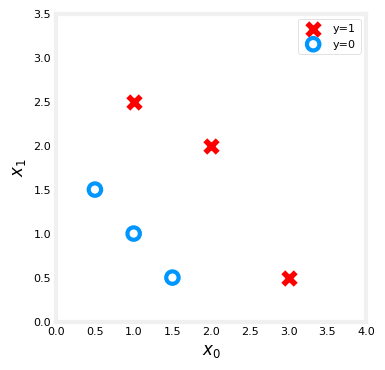

In [17]:
fig,ax=plt.subplots(1,1,figsize=(4,4))

""" plots logistic data with two axis """
plot_data(X_train,y_train,ax)

#set the axis and the label
ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

## cost function


In a previous lab, you developed the *logistic loss* function. Recall, loss is defined to apply to one example. Here you combine the losses to form the **cost**, which includes all the examples.


Recall that for logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
*  where m is the number of training examples in the data set and:
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5} 
\end{align}
$$
 

In [25]:
def compute_cost_logistic(X,y,w,b):
    m=X.shape[0]
    cost=0.0
    for i in range(m):
        z_i=np.dot(X[i],w)+b
        f_wb_i=sigmoid(z_i)
        cost+=(y[i]*np.log(f_wb_i))+((1-y[i])*np.log(1-f_wb_i))
    cost=cost*(-1/m)

    return cost

In [26]:
w_tmp = np.array([1,1])
b_tmp = -3
print(compute_cost_logistic(X_train, y_train, w_tmp, b_tmp))

0.3668667864055174


excercise 


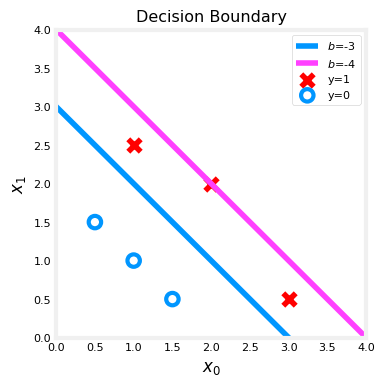

In [31]:
# Choose values between 0 and 6
x0 = np.arange(0,6)

# Plot the two decision boundaries
x1 = 3 - x0          # b=-3 w1=1 w2=1
x1_other = 4 - x0    # b=-4 w1=1 w2=1

fig,ax = plt.subplots(1, 1, figsize=(4,4))

# Plot the decision boundary
ax.plot(x0,x1, c=dlc["dlblue"], label="$b$=-3")
ax.plot(x0,x1_other, c=dlc["dlmagenta"], label="$b$=-4")
ax.axis([0, 4, 0, 4])

# Plot the original data
plot_data(X_train,y_train,ax)
ax.axis([0, 4, 0, 4])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

so the b=-4 is the worest desicion boundary compared to b=-3

we can check the cost function for the b=-4 and b=-3

In [39]:
w_1=np.array([1,1])
b_1=-3
w_2=np.array([1,1])
b_2=-4

cost_3=compute_cost_logistic(X_train,y_train,w_1,b_1)
cost_4=compute_cost_logistic(X_train,y_train,w_2,b_2)

print(f"""cost b=-3 is:  {cost_3}
cost b=-4 is:  {cost_4}""")

print("so b=-4 is higher than b=-3, which is the not good parameter")

cost b=-3 is:  0.3668667864055174
cost b=-4 is:  0.503680863674846
so b=-4 is higher than b=-3, which is the not good parameter
